In [1]:
import pandas as pd

# Assuming you have the data in a CSV file
data = pd.read_csv('Amazon Sale Report.csv', low_memory=False)


In [2]:
# Check the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Check the data types of each column
print(data.dtypes)

# Get some basic statistics for numerical columns
print(data.describe())


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

In [3]:
# Dropping rows with missing 'Amount' or 'Qty' 
data = data.dropna(subset=['Amount', 'Qty'])

# Drop duplicate rows
data = data.drop_duplicates()

# Convert the 'Amount' column to numeric
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [4]:
# Convert the 'Date' column to datetime format
# Define a function to parse dates
def parse_date(date_str):
    for fmt in ("%d-%m-%y", "%d/%m/%Y", "%Y-%m-%d", "%m-%d-%Y"):  # Multiple formats
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Apply the date parsing function
data['Date'] = data['Date'].apply(parse_date)


Perform basic analysis on the dataset to understand trends and insights.

a. Status Analysis
Analyze the distribution of order statuses.

Status
Shipped                          77596
Shipped - Delivered to Buyer     28761
Cancelled                        10766
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


<Axes: xlabel='Status'>

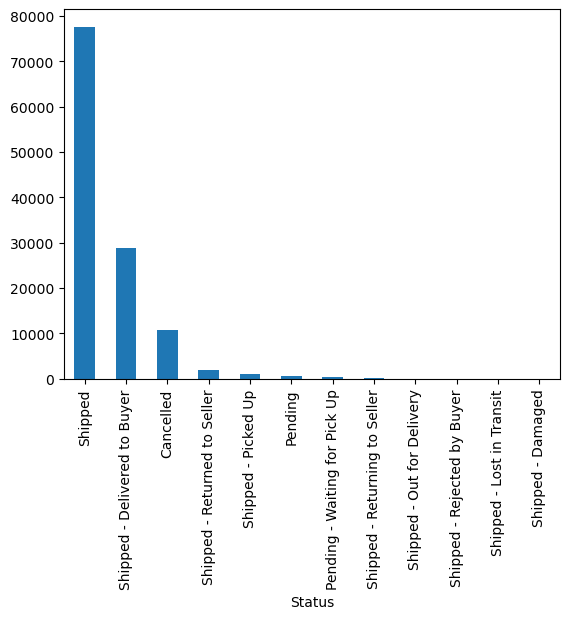

In [5]:
status_count = data['Status'].value_counts()
print(status_count)

# Plot the distribution of 'Status'
status_count.plot(kind='bar')

b. Sales by Category
You can look at sales by category or SKU to find the most popular items.

Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64


<Axes: xlabel='Category'>

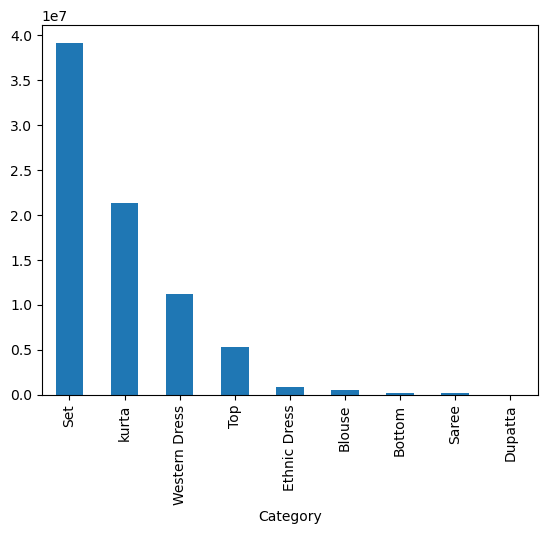

In [6]:
# Group by 'Category' and sum the sales (Amount)
sales_by_category = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(sales_by_category)

# Plot sales by category
sales_by_category.plot(kind='bar')